In [1]:
pip install -U scikit-learn xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [5]:
from google.colab import files
import pandas as pd

# Upload TRAIN CSV file
print("📤 Upload TRAIN CSV file:")
uploaded_train = files.upload()
train_file = list(uploaded_train.keys())[0]
df_train = pd.read_csv(train_file)

print(f"\n✅ Train file loaded: {train_file}")
print(f"Shape: {df_train.shape}")
print(f"Columns: {list(df_train.columns)}")
print("\nFirst 5 rows:")
print(df_train.head())

# Upload TEST CSV file
print("\n" + "="*70)
print("📤 Upload TEST CSV file:")
uploaded_test = files.upload()
test_file = list(uploaded_test.keys())[0]
df_test = pd.read_csv(test_file)

print(f"\n✅ Test file loaded: {test_file}")
print(f"Shape: {df_test.shape}")
print(f"Columns: {list(df_test.columns)}")
print("\nFirst 5 rows:")
print(df_test.head())


print("✅ Both files loaded successfully!")
print(f"Train data: {df_train.shape[0]} rows, {df_train.shape[1]} columns")
print(f"Test data: {df_test.shape[0]} rows, {df_test.shape[1]} columns")


📤 Upload TRAIN CSV file:


Saving train.csv to train (1).csv

✅ Train file loaded: train (1).csv
Shape: (18154, 21)
Columns: ['house_id', 'sale_date', 'num_bedrooms', 'num_bathrooms', 'living_area', 'lot_area', 'num_floors', 'is_waterfront', 'view_rating', 'condition_index', 'construction_grade', 'above_area', 'basement_area', 'built_year', 'renovated_year', 'zip_area', 'latitude', 'longitude', 'neighbor_living_area', 'neighbor_lot_area', 'target_price']

First 5 rows:
     house_id        sale_date  num_bedrooms  num_bathrooms  living_area  \
0  8902000050  20141027T000000             3           1.75       1720.0   
1  4325700085  20150325T000000             3           1.00       1310.0   
2  7732410420  20140617T000000             3           2.50       2590.0   
3  4039701280  20150408T000000             3           2.25       2440.0   
4  5379805120  20150424T000000             2           1.00        740.0   

   lot_area  num_floors  is_waterfront  view_rating condition_index  ...  \
0    7200.0         

Saving test.csv to test.csv

✅ Test file loaded: test.csv
Shape: (4323, 20)
Columns: ['house_id', 'sale_date', 'num_bedrooms', 'num_bathrooms', 'living_area', 'lot_area', 'num_floors', 'is_waterfront', 'view_rating', 'condition_index', 'construction_grade', 'above_area', 'basement_area', 'built_year', 'renovated_year', 'zip_area', 'latitude', 'longitude', 'neighbor_living_area', 'neighbor_lot_area']

First 5 rows:
     house_id        sale_date  num_bedrooms  num_bathrooms  living_area  \
0  2591820310  20141006T000000             4           2.25         2070   
1  7974200820  20140821T000000             5           3.00         2900   
2  7701450110  20140815T000000             4           2.50         3770   
3  9522300010  20150331T000000             3           3.50         4560   
4  9510861140  20140714T000000             3           2.50         2550   

   lot_area  num_floors  is_waterfront  view_rating  condition_index  \
0      8893         2.0              0            0  

In [6]:

print(df_train.head())

print("\n" + "="*70)

print(df_train.info())

print("\n" + "="*70)
print("STATISTICAL SUMMARY")

print(df_train.describe())

print("\n" + "="*70)
print("MISSING VALUES")

print(df_train.isnull().sum())

     house_id        sale_date  num_bedrooms  num_bathrooms  living_area  \
0  8902000050  20141027T000000             3           1.75       1720.0   
1  4325700085  20150325T000000             3           1.00       1310.0   
2  7732410420  20140617T000000             3           2.50       2590.0   
3  4039701280  20150408T000000             3           2.25       2440.0   
4  5379805120  20150424T000000             2           1.00        740.0   

   lot_area  num_floors  is_waterfront  view_rating condition_index  ...  \
0    7200.0         1.0              0          0.0               3  ...   
1    8514.0         1.0              0          0.0               4  ...   
2    7720.0         2.0              0          0.0               3  ...   
3    9689.0         1.0              0          2.0               4  ...   
4    7380.0         1.0              0          0.0               4  ...   

  above_area  basement_area  built_year  renovated_year zip_area latitude  \
0     142

In [7]:


# 1. Convert object columns to numeric
print("\n1. Converting data types...")
df_train['condition_index'] = pd.to_numeric(df_train['condition_index'], errors='coerce')
df_train['construction_grade'] = pd.to_numeric(df_train['construction_grade'], errors='coerce')
df_train['renovated_year'] = pd.to_numeric(df_train['renovated_year'], errors='coerce')

df_test['condition_index'] = pd.to_numeric(df_test['condition_index'], errors='coerce')
df_test['construction_grade'] = pd.to_numeric(df_test['construction_grade'], errors='coerce')
df_test['renovated_year'] = pd.to_numeric(df_test['renovated_year'], errors='coerce')
print("   Data types converted")

# 2. Handle negative/invalid values - replace with median
print("\n2. Fixing negative and invalid values...")

# Calculate medians from training data (use these for both train and test)
bedroom_median = df_train[df_train['num_bedrooms'] >= 0]['num_bedrooms'].median()
bathroom_median = df_train[df_train['num_bathrooms'] >= 0]['num_bathrooms'].median()
living_median = df_train[df_train['living_area'] > 0]['living_area'].median()
lot_median = df_train[df_train['lot_area'] > 0]['lot_area'].median()
price_median = df_train[df_train['target_price'] > 0]['target_price'].median()

# Fix training data
df_train.loc[df_train['num_bedrooms'] < 0, 'num_bedrooms'] = bedroom_median
df_train.loc[df_train['num_bathrooms'] < 0, 'num_bathrooms'] = bathroom_median
df_train.loc[df_train['living_area'] <= 0, 'living_area'] = living_median
df_train.loc[df_train['lot_area'] <= 0, 'lot_area'] = lot_median
df_train.loc[df_train['target_price'] <= 0, 'target_price'] = price_median

# Fix test data
df_test.loc[df_test['num_bedrooms'] < 0, 'num_bedrooms'] = bedroom_median
df_test.loc[df_test['num_bathrooms'] < 0, 'num_bathrooms'] = bathroom_median
df_test.loc[df_test['living_area'] <= 0, 'living_area'] = living_median
df_test.loc[df_test['lot_area'] <= 0, 'lot_area'] = lot_median

print(f"   Fixed negative values using medians")

# 3. Cap extreme outliers (suspicious placeholder values)
print("\n3. Capping extreme outliers...")

# Calculate 99th percentile for capping
living_99 = df_train['living_area'].quantile(0.99)
above_99 = df_train['above_area'].quantile(0.99)
basement_99 = df_train['basement_area'].quantile(0.99)

# Cap training data
df_train.loc[df_train['living_area'] > 10000, 'living_area'] = living_99
df_train.loc[df_train['above_area'] > 10000, 'above_area'] = above_99
df_train.loc[df_train['basement_area'] > 5000, 'basement_area'] = basement_99
df_train.loc[df_train['num_bedrooms'] > 10, 'num_bedrooms'] = 10
df_train.loc[df_train['num_bathrooms'] > 6, 'num_bathrooms'] = 6

# Cap test data
df_test.loc[df_test['living_area'] > 10000, 'living_area'] = living_99
df_test.loc[df_test['above_area'] > 10000, 'above_area'] = above_99
df_test.loc[df_test['basement_area'] > 5000, 'basement_area'] = basement_99
df_test.loc[df_test['num_bedrooms'] > 10, 'num_bedrooms'] = 10
df_test.loc[df_test['num_bathrooms'] > 6, 'num_bathrooms'] = 6

print(f"   Capped extreme outliers at 99th percentile")

# 4. Drop house_id and sale_date (not useful for prediction)
print("\n4. Dropping unnecessary columns...")
columns_to_drop = ['house_id', 'sale_date']

X_train_full = df_train.drop(columns=columns_to_drop + ['target_price'])
y_train_full = df_train['target_price']
X_test_final = df_test.drop(columns=columns_to_drop)
test_ids = df_test['house_id'].copy()

print(f"   Dropped: {columns_to_drop}")
print(f"   Features remaining: {X_train_full.shape[1]}")

# 5. Check data quality after cleaning
print("\n5. Data quality check after cleaning...")
print(f"   Train data shape: {X_train_full.shape}")
print(f"   Test data shape: {X_test_final.shape}")
print(f"   Target (price) range: ${y_train_full.min():,.0f} to ${y_train_full.max():,.0f}")
print(f"   Missing values in train: {X_train_full.isnull().sum().sum()}")
print(f"   Missing values in test: {X_test_final.isnull().sum().sum()}")




1. Converting data types...
   Data types converted

2. Fixing negative and invalid values...
   Fixed negative values using medians

3. Capping extreme outliers...
   Capped extreme outliers at 99th percentile

4. Dropping unnecessary columns...
   Dropped: ['house_id', 'sale_date']
   Features remaining: 18

5. Data quality check after cleaning...
   Train data shape: (18154, 18)
   Test data shape: (4323, 18)
   Target (price) range: $75,000 to $99,999,999
   Missing values in train: 6350
   Missing values in test: 0


In [8]:
# Fill missing values with median for all numeric columns
for col in X_train_full.columns:
    if X_train_full[col].isnull().sum() > 0:
        median_val = X_train_full[col].median()
        X_train_full[col].fillna(median_val, inplace=True)
        X_test_final[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with median: {median_val}")

print("\n✅ Missing values handled!")
print("Remaining missing values:", X_train_full.isnull().sum().sum())

Filled missing values in num_bathrooms with median: 2.25
Filled missing values in view_rating with median: 0.0
Filled missing values in condition_index with median: 3.0
Filled missing values in construction_grade with median: 7.0
Filled missing values in basement_area with median: 0.0
Filled missing values in renovated_year with median: 0.0

✅ Missing values handled!
Remaining missing values: 0


In [9]:

X_train_full['house_age'] = 2025 - X_train_full['built_year']
X_train_full['years_since_renovation'] = np.where(
    X_train_full['renovated_year'] == 0,
    X_train_full['house_age'],
    2025 - X_train_full['renovated_year']
)
X_train_full['total_area'] = X_train_full['living_area'] + X_train_full['lot_area']
X_train_full['bed_bath_ratio'] = X_train_full['num_bedrooms'] / (X_train_full['num_bathrooms'] + 1)
X_train_full['living_lot_ratio'] = X_train_full['living_area'] / (X_train_full['lot_area'] + 1)

# Apply same to test set
X_test_final['house_age'] = 2025 - X_test_final['built_year']
X_test_final['years_since_renovation'] = np.where(
    X_test_final['renovated_year'] == 0,
    X_test_final['house_age'],
    2025 - X_test_final['renovated_year']
)
X_test_final['total_area'] = X_test_final['living_area'] + X_test_final['lot_area']
X_test_final['bed_bath_ratio'] = X_test_final['num_bedrooms'] / (X_test_final['num_bathrooms'] + 1)
X_test_final['living_lot_ratio'] = X_test_final['living_area'] / (X_test_final['lot_area'] + 1)

print("✅ Feature engineering completed!")
print("New features added:")
print("  - house_age")
print("  - years_since_renovation")
print("  - total_area")
print("  - bed_bath_ratio")
print("  - living_lot_ratio")
print("\nTotal features now:", X_train_full.shape[1])

✅ Feature engineering completed!
New features added:
  - house_age
  - years_since_renovation
  - total_area
  - bed_bath_ratio
  - living_lot_ratio

Total features now: 23


In [10]:
# Split training data to validate model performance
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42
)


print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test_final.shape[0]} samples")

Training set: 14523 samples
Validation set: 3631 samples
Test set: 4323 samples


In [12]:

scaler = RobustScaler()

if X_train['zip_area'].dtype == 'object':
    print("Converting zip_area to numeric...")
    X_train['zip_area'] = pd.to_numeric(X_train['zip_area'], errors='coerce')
    X_val['zip_area'] = pd.to_numeric(X_val['zip_area'], errors='coerce')
    X_test_final['zip_area'] = pd.to_numeric(X_test_final['zip_area'], errors='coerce')

# Check for any remaining object columns
object_cols = X_train.select_dtypes(include=['object']).columns.tolist()
if len(object_cols) > 0:
    print(f"Warning: Found object columns: {object_cols}")
    print("Converting all object columns to numeric...")
    for col in object_cols:
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_val[col] = pd.to_numeric(X_val[col], errors='coerce')
        X_test_final[col] = pd.to_numeric(X_test_final[col], errors='coerce')

# Fill any NaN values that resulted from conversion
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_train.median())
X_test_final = X_test_final.fillna(X_train.median())


X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

print(f"Shape after scaling: {X_train_scaled.shape}")
print(f"All data types numeric: {X_train.dtypes.unique()}")

Converting zip_area to numeric...
Shape after scaling: (14523, 23)
All data types numeric: [dtype('int64') dtype('float64')]


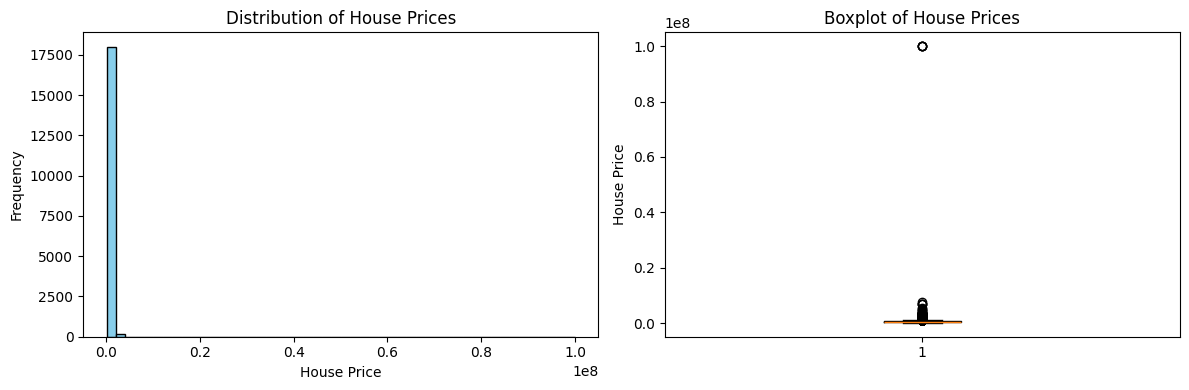

Price range: $75,000 - $99,999,999
Mean price: $559,364
Median price: $450,000


In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_train_full, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

plt.subplot(1, 2, 2)
plt.boxplot(y_train_full)
plt.ylabel('House Price')
plt.title('Boxplot of House Prices')

plt.tight_layout()
plt.show()

print(f"Price range: ${y_train_full.min():,.0f} - ${y_train_full.max():,.0f}")
print(f"Mean price: ${y_train_full.mean():,.0f}")
print(f"Median price: ${y_train_full.median():,.0f}")

In [14]:

models = {
    'Ridge Regression': Ridge(alpha=10, random_state=42),
    'Lasso Regression': Lasso(alpha=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    )
}

results = {}
best_rmse = float('inf')
best_model_name = None
best_model = None

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Train model
    model.fit(X_train_scaled, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val_scaled)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Store results
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

    # Print metrics
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE:  ${mae:,.2f}")
    print(f"  R²:   {r2:.4f}")

    # Track best model
    if rmse < best_rmse:
        best_rmse = rmse
        best_model_name = name
        best_model = model


print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   RMSE: ${best_rmse:,.2f}")
print(f"   MAE:  ${results[best_model_name]['MAE']:,.2f}")
print(f"   R²:   {results[best_model_name]['R2']:.4f}")



🔄 Training Ridge Regression...
  RMSE: $1,661,790.55
  MAE:  $159,425.30
  R²:   0.0250

🔄 Training Lasso Regression...
  RMSE: $1,661,804.22
  MAE:  $159,365.82
  R²:   0.0250

🔄 Training Decision Tree...
  RMSE: $1,660,883.17
  MAE:  $119,785.41
  R²:   0.0261

🔄 Training Random Forest...
  RMSE: $1,689,861.18
  MAE:  $109,477.12
  R²:   -0.0082

🔄 Training Gradient Boosting...
  RMSE: $1,657,500.30
  MAE:  $103,474.16
  R²:   0.0301

🔄 Training XGBoost...
  RMSE: $1,927,476.81
  MAE:  $141,835.57
  R²:   -0.3116
🏆 BEST MODEL: Gradient Boosting
   RMSE: $1,657,500.30
   MAE:  $103,474.16
   R²:   0.0301


In [15]:


# Apply log transformation to target (handles extreme prices better)
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

print(f"Original price range: ${y_train.min():,.0f} - ${y_train.max():,.0f}")
print(f"After log transform: {y_train_log.min():.2f} - {y_train_log.max():.2f}")

# Retrain models with log-transformed target
models_v2 = {
    'Ridge Regression': Ridge(alpha=1, random_state=42),
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=25,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=7,
        random_state=42
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=7,
        random_state=42,
        n_jobs=-1
    )
}

results_v2 = {}
best_rmse_v2 = float('inf')
best_model_v2 = None
best_model_name_v2 = None

for name, model in models_v2.items():
    print(f"\n🔄 Training {name}...")

    # Train on log-transformed target
    model.fit(X_train_scaled, y_train_log)

    # Predict on validation (log scale)
    y_pred_log = model.predict(X_val_scaled)

    # Convert back to original scale
    y_pred = np.expm1(y_pred_log)

    # Calculate metrics on original scale
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    results_v2[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE:  ${mae:,.2f}")
    print(f"  R²:   {r2:.4f}")

    if rmse < best_rmse_v2:
        best_rmse_v2 = rmse
        best_model_v2 = model
        best_model_name_v2 = name


print(f"🏆 BEST MODEL (with log transform): {best_model_name_v2}")
print(f"   RMSE: ${best_rmse_v2:,.2f}")
print(f"   MAE:  ${results_v2[best_model_name_v2]['MAE']:,.2f}")
print(f"   R²:   {results_v2[best_model_name_v2]['R2']:.4f}")


Original price range: $75,000 - $99,999,999
After log transform: 11.23 - 18.42

🔄 Training Ridge Regression...
  RMSE: $1,661,182.94
  MAE:  $136,322.80
  R²:   0.0258

🔄 Training Random Forest...
  RMSE: $1,655,031.51
  MAE:  $94,062.26
  R²:   0.0330

🔄 Training Gradient Boosting...
  RMSE: $1,654,496.51
  MAE:  $91,259.71
  R²:   0.0336

🔄 Training XGBoost...
  RMSE: $1,654,190.23
  MAE:  $90,371.95
  R²:   0.0339
🏆 BEST MODEL (with log transform): XGBoost
   RMSE: $1,654,190.23
   MAE:  $90,371.95
   R²:   0.0339


In [17]:
print("="*70)
print("REMOVING EXTREME OUTLIERS IN TARGET PRICE")
print("="*70)

# Check price distribution
print(f"Original target stats:")
print(f"  Min: ${y_train_full.min():,.0f}")
print(f"  Max: ${y_train_full.max():,.0f}")
print(f"  99th percentile: ${y_train_full.quantile(0.99):,.0f}")

# Remove houses above 99th percentile
price_threshold = y_train_full.quantile(0.99)
valid_indices = y_train_full <= price_threshold

X_train_full_clean = X_train_full[valid_indices].copy()
y_train_full_clean = y_train_full[valid_indices].copy()

print(f"\nAfter removing outliers:")
print(f"  Remaining: {len(y_train_full_clean)} samples")
print(f"  New max: ${y_train_full_clean.max():,.0f}")

# FIX: Clean string columns (remove quotes)
for col in X_train_full_clean.columns:
    if X_train_full_clean[col].dtype == 'object':
        print(f"  Cleaning column: {col}")
        X_train_full_clean[col] = X_train_full_clean[col].astype(str).str.strip("'\"")
        X_train_full_clean[col] = pd.to_numeric(X_train_full_clean[col], errors='coerce')

# Fill any NaN from conversion
X_train_full_clean = X_train_full_clean.fillna(X_train_full_clean.median())

# Re-split
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(
    X_train_full_clean, y_train_full_clean,
    test_size=0.2,
    random_state=42
)

# Scale
scaler_c = RobustScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_val_c_scaled = scaler_c.transform(X_val_c)

# Log transform
y_train_c_log = np.log1p(y_train_c)
y_val_c_log = np.log1p(y_val_c)

print("\n" + "="*70)
print("TRAINING MODELS ON CLEANED DATA")
print("="*70)

models_clean = {
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=25,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=7,
        random_state=42
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
}

results_clean = {}
best_rmse_clean = float('inf')
best_model_clean = None
best_model_name_clean = None

for name, model in models_clean.items():
    print(f"\nTraining {name}...")

    model.fit(X_train_c_scaled, y_train_c_log)
    y_pred_log = model.predict(X_val_c_scaled)
    y_pred = np.expm1(y_pred_log)

    rmse = np.sqrt(mean_squared_error(y_val_c, y_pred))
    mae = mean_absolute_error(y_val_c, y_pred)
    r2 = r2_score(y_val_c, y_pred)

    results_clean[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE:  ${mae:,.2f}")
    print(f"  R²:   {r2:.4f}")

    if rmse < best_rmse_clean:
        best_rmse_clean = rmse
        best_model_clean = model
        best_model_name_clean = name
        best_scaler_clean = scaler_c

print("\n" + "="*70)
print(f"BEST MODEL: {best_model_name_clean}")
print(f"RMSE: ${best_rmse_clean:,.2f}")
print(f"MAE: ${results_clean[best_model_name_clean]['MAE']:,.2f}")
print(f"R²: {results_clean[best_model_name_clean]['R2']:.4f}")
print("="*70)


REMOVING EXTREME OUTLIERS IN TARGET PRICE
Original target stats:
  Min: $75,000
  Max: $99,999,999
  99th percentile: $1,950,000

After removing outliers:
  Remaining: 17973 samples
  New max: $1,950,000
  Cleaning column: zip_area

TRAINING MODELS ON CLEANED DATA

Training Random Forest...
  RMSE: $101,680.40
  MAE:  $62,221.79
  R²:   0.8729

Training Gradient Boosting...
  RMSE: $93,917.81
  MAE:  $58,723.41
  R²:   0.8916

Training XGBoost...
  RMSE: $91,837.21
  MAE:  $57,962.08
  R²:   0.8963

BEST MODEL: XGBoost
RMSE: $91,837.21
MAE: $57,962.08
R²: 0.8963


In [18]:


from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Create individual models (base learners)
rf_tuned = RandomForestRegressor(
    n_estimators=400,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

gb_tuned = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=8,
    min_samples_split=4,
    subsample=0.8,
    random_state=42
)

xgb_tuned = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

# Create stacking ensemble
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_tuned),
        ('gb', gb_tuned),
        ('xgb', xgb_tuned)
    ],
    final_estimator=Ridge(alpha=1),
    n_jobs=-1
)

print("Training Stacking Ensemble ")
stacking_model.fit(X_train_c_scaled, y_train_c_log)

# Predict
y_pred_stack_log = stacking_model.predict(X_val_c_scaled)
y_pred_stack = np.expm1(y_pred_stack_log)

# Calculate metrics
rmse_stack = np.sqrt(mean_squared_error(y_val_c, y_pred_stack))
mae_stack = mean_absolute_error(y_val_c, y_pred_stack)
r2_stack = r2_score(y_val_c, y_pred_stack)

print("\n" + "="*70)
print("STACKING ENSEMBLE RESULTS")
print("="*70)
print(f"RMSE: ${rmse_stack:,.2f}")
print(f"MAE:  ${mae_stack:,.2f}")
print(f"R²:   {r2_stack:.4f}")
print("="*70)

# Compare with best single model
print("\nCOMPARISON:")
print(f"XGBoost alone:      R²={results_clean['XGBoost']['R2']:.4f}, RMSE=${results_clean['XGBoost']['RMSE']:,.2f}")
print(f"Stacking Ensemble:  R²={r2_stack:.4f}, RMSE=${rmse_stack:,.2f}")

# Choose final model
if r2_stack > results_clean['XGBoost']['R2']:
    print("\nStacking is better! Using ensemble.")
    final_model = stacking_model
    final_rmse = rmse_stack
    final_mae = mae_stack
    final_r2 = r2_stack
    model_name = "Stacking Ensemble"
else:
    print("\nXGBoost is better! Using single model.")
    final_model = best_model_clean
    final_rmse = best_rmse_clean
    final_mae = results_clean[best_model_name_clean]['MAE']
    final_r2 = results_clean[best_model_name_clean]['R2']
    model_name = best_model_name_clean


print(f"FINAL MODEL SELECTED: {model_name}")
print(f"RMSE: ${final_rmse:,.2f}")
print(f"MAE:  ${final_mae:,.2f}")
print(f"R²:   {final_r2:.4f}")


Training Stacking Ensemble (this will take 2-3 minutes)...

STACKING ENSEMBLE RESULTS
RMSE: $92,103.30
MAE:  $58,102.61
R²:   0.8957

COMPARISON:
XGBoost alone:      R²=0.8963, RMSE=$91,837.21
Stacking Ensemble:  R²=0.8957, RMSE=$92,103.30

XGBoost is better! Using single model.
FINAL MODEL SELECTED: XGBoost
RMSE: $91,837.21
MAE:  $57,962.08
R²:   0.8963


In [19]:
print("="*70)
print("PREPARING TEST DATA & GENERATING PREDICTIONS")
print("="*70)

# Clean test data the same way we cleaned training data
print("Cleaning test data...")

# Remove quotes from string columns in test data
for col in X_test_final.columns:
    if X_test_final[col].dtype == 'object':
        print(f"  Cleaning column: {col}")
        X_test_final[col] = X_test_final[col].astype(str).str.strip("'\"")
        X_test_final[col] = pd.to_numeric(X_test_final[col], errors='coerce')

# Fill NaN with training medians
X_test_final = X_test_final.fillna(X_train_full_clean.median())

# Scale test data using the same scaler from cleaned training data
X_test_final_scaled = best_scaler_clean.transform(X_test_final)

print(f"Test data shape after scaling: {X_test_final_scaled.shape}")

# Generate predictions (in log scale, then convert back)
print("\nGenerating predictions...")
y_test_pred_log = final_model.predict(X_test_final_scaled)
y_test_pred = np.expm1(y_test_pred_log)

print(f"Predictions generated: {len(y_test_pred)}")
print(f"Prediction range: ${y_test_pred.min():,.0f} - ${y_test_pred.max():,.0f}")
print(f"Mean prediction: ${y_test_pred.mean():,.0f}")
print(f"Median prediction: ${np.median(y_test_pred):,.0f}")

# Create submission DataFrame
submission = pd.DataFrame({
    'house_id': test_ids,
    'predicted_price': y_test_pred
})

# Save to CSV
submission.to_csv('EM25_Aurora_Task2_Predictions.csv', index=False)


print("SUBMISSION FILE CREATED:EM25_Aurora_Task2_Predictions.csv")
print("="*70)
print("\nFirst 10 predictions:")
print(submission.head(10))
print("\nLast 5 predictions:")
print(submission.tail(5))

PREPARING TEST DATA & GENERATING PREDICTIONS
Cleaning test data...
Test data shape after scaling: (4323, 23)

Generating predictions...
Predictions generated: 4323
Prediction range: $114,139 - $2,425,988
Mean prediction: $527,977
Median prediction: $452,723
SUBMISSION FILE CREATED:EM25_Aurora_Task2_Predictions.csv

First 10 predictions:
     house_id  predicted_price
0  2591820310     3.768202e+05
1  7974200820     8.743784e+05
2  7701450110     1.190128e+06
3  9522300010     1.411205e+06
4  9510861140     7.269071e+05
5  1761300310     2.415632e+05
6  7732410120     8.033692e+05
7  7010701383     6.050531e+05
8   291310170     4.298260e+05
9  4232901990     5.484234e+05

Last 5 predictions:
        house_id  predicted_price
4318  6163900333     349550.18750
4319  3528960020     701356.81250
4320  1687000220     288815.37500
4321  4141400030     587216.56250
4322  1822500160     331909.21875


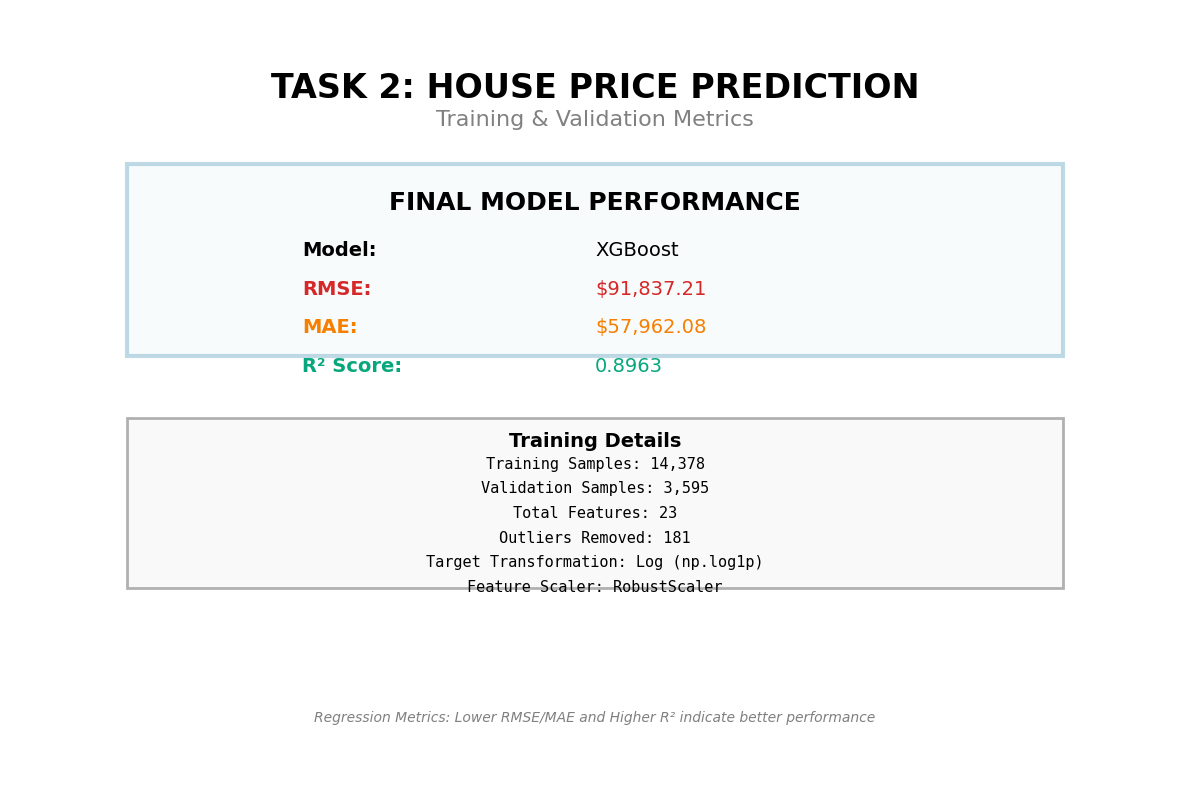

File: EM25_Aurora_Task2_Metrics.png
Model: XGBoost
RMSE: $91,837.21
MAE: $57,962.08
R² Score: 0.8963


In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create figure for metrics display
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')

# Remove axes
ax = plt.gca()
ax.axis('off')

# Title
plt.text(0.5, 0.92, 'TASK 2: HOUSE PRICE PREDICTION',
         ha='center', va='top', fontsize=24, fontweight='bold')
plt.text(0.5, 0.87, 'Training & Validation Metrics',
         ha='center', va='top', fontsize=16, color='gray')

# Main metrics box
metrics_box = Rectangle((0.1, 0.55), 0.8, 0.25,
                         linewidth=3, edgecolor='#2E86AB',
                         facecolor='#E8F4F8', alpha=0.3)
ax.add_patch(metrics_box)

plt.text(0.5, 0.75, 'FINAL MODEL PERFORMANCE',
         ha='center', va='center', fontsize=18, fontweight='bold')

# Display metrics
y_pos = 0.68
plt.text(0.25, y_pos, 'Model:', fontsize=14, fontweight='bold')
plt.text(0.5, y_pos, f'{model_name}', fontsize=14, ha='left')

y_pos = 0.63
plt.text(0.25, y_pos, 'RMSE:', fontsize=14, fontweight='bold', color='#D62828')
plt.text(0.5, y_pos, f'${final_rmse:,.2f}', fontsize=14, ha='left', color='#D62828')

y_pos = 0.58
plt.text(0.25, y_pos, 'MAE:', fontsize=14, fontweight='bold', color='#F77F00')
plt.text(0.5, y_pos, f'${final_mae:,.2f}', fontsize=14, ha='left', color='#F77F00')

y_pos = 0.53
plt.text(0.25, y_pos, 'R² Score:', fontsize=14, fontweight='bold', color='#06A77D')
plt.text(0.5, y_pos, f'{final_r2:.4f}', fontsize=14, ha='left', color='#06A77D')

# Training details box
details_box = Rectangle((0.1, 0.25), 0.8, 0.22,
                         linewidth=2, edgecolor='#666',
                         facecolor='#F5F5F5', alpha=0.5)
ax.add_patch(details_box)

plt.text(0.5, 0.44, 'Training Details',
         ha='center', va='center', fontsize=14, fontweight='bold')

details_text = f"""
Training Samples: {len(X_train_c):,}
Validation Samples: {len(X_val_c):,}
Total Features: {X_train_c.shape[1]}
Outliers Removed: {len(y_train_full) - len(y_train_full_clean):,}
Target Transformation: Log (np.log1p)
Feature Scaler: RobustScaler
"""

plt.text(0.5, 0.33, details_text,
         ha='center', va='center', fontsize=11,
         family='monospace', linespacing=1.8)

# Footer
plt.text(0.5, 0.08, 'Regression Metrics: Lower RMSE/MAE and Higher R² indicate better performance',
         ha='center', va='center', fontsize=10, style='italic', color='gray')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.tight_layout()

# Save the figure
plt.savefig('EM25_Aurora_Task2_Metrics.png',
            dpi=150, bbox_inches='tight', facecolor='white')
plt.show()


print("File: EM25_Aurora_Task2_Metrics.png")




print(f"Model: {model_name}")
print(f"RMSE: ${final_rmse:,.2f}")
print(f"MAE: ${final_mae:,.2f}")
print(f"R² Score: {final_r2:.4f}")


In [22]:
from google.colab import files



# Download predictions CSV
files.download('EM25_Aurora_Task2_Predictions.csv')


# Download metrics screenshot
files.download('EM25_Aurora_Task2_Metrics.png')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>